## ProjF2 - Data Exploration

Use this document as a template to provide some exploratory analysis of your data similar to the one in ProjC1. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


/var/folders/jk/wt3glx4s7vxblnk59wqsvwtr0000gn/T/ipykernel_25457/3589354079.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Our dataset consists of Company stock data from the Forbes, Nasdaq, NYSE, SP500. In this file we will be focusing on analysis and visualization of one company (AAPL) from the Forbes Dataset and one (NVDA) from NASDAQ Dataset.**

### 1. Load and Visualize Data

Let's start by loading your entire dataset or a sample if it is a larger dataset.

In [6]:
df = pd.read_csv('/Users/ishikag/Documents/stock_market_data/forbes2000/csv/AAPL.csv')
df.head(15)

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.099874
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.094663
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.087715
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.089886
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092492
5,19-12-1980,0.126116,0.126116,48630400,0.126674,0.126116,0.098137
6,22-12-1980,0.132254,0.132254,37363200,0.132813,0.132254,0.102913
7,23-12-1980,0.137835,0.137835,46950400,0.138393,0.137835,0.107256
8,24-12-1980,0.145089,0.145089,48003200,0.145647,0.145089,0.112901
9,26-12-1980,0.158482,0.158482,55574400,0.159040,0.158482,0.123323


In [7]:
df2 = pd.read_csv('/Users/ishikag/Documents/stock_market_data/nasdaq/csv/NVDA.csv')
df2.head(15)

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,22-01-1999,0.388021,0.437500,271468800,0.488281,0.410156,0.376886
1,25-01-1999,0.410156,0.442708,51048000,0.458333,0.453125,0.416370
2,26-01-1999,0.411458,0.458333,34320000,0.467448,0.417969,0.384065
3,27-01-1999,0.395833,0.419271,24436800,0.429688,0.416667,0.382869
4,28-01-1999,0.412760,0.416667,22752000,0.419271,0.415365,0.381673
5,29-01-1999,0.395833,0.415365,24403200,0.416667,0.395833,0.363725
6,01-02-1999,0.395833,0.395833,15470400,0.406250,0.403646,0.370904
7,02-02-1999,0.360677,0.395833,26409600,0.406250,0.372396,0.342189
8,03-02-1999,0.364583,0.367188,7512000,0.385417,0.380208,0.349367
9,04-02-1999,0.380208,0.385417,18192000,0.411458,0.401042,0.368511


In [8]:
df.shape

(10590, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10590 entries, 0 to 10589
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10590 non-null  object 
 1   Low             10590 non-null  float64
 2   Open            10590 non-null  float64
 3   Volume          10590 non-null  int64  
 4   High            10590 non-null  float64
 5   Close           10590 non-null  float64
 6   Adjusted Close  10590 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 579.3+ KB


In [10]:
df2.shape

(6013, 7)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6013 non-null   object 
 1   Low             6013 non-null   float64
 2   Open            6013 non-null   float64
 3   Volume          6013 non-null   int64  
 4   High            6013 non-null   float64
 5   Close           6013 non-null   float64
 6   Adjusted Close  6013 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 329.0+ KB


Provide some visualization of the data. For example,
- If your data is time series, you can plot a sequence and the response or label.
- If tabular data, you can plot histograms of the data.
- If working with image recognition or segmentation, you can show an image and the corresponding output.
- If it is a video that you are processing, just show screenshots.
- If doing something with reinforcement learning, you can provide samples of the simulation environment used.

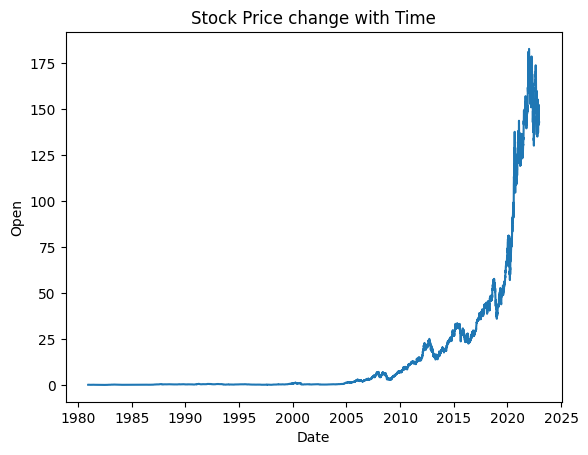

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

# Plot the 'Open' column over time
plt.plot(df['Date'], df['Open'])
plt.xlabel('Date')
plt.ylabel('Open')

plt.title('Stock Price change with Time')
plt.show()

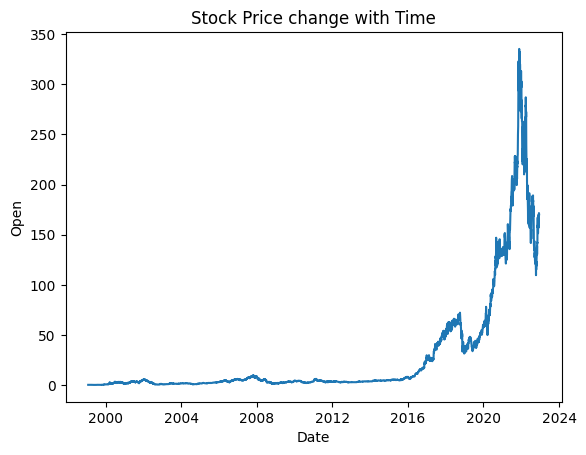

In [13]:
df2['Date'] = pd.to_datetime(df2['Date'], format="%d-%m-%Y")

# Plot the 'Open' column over time
plt.plot(df2['Date'], df2['Open'])
plt.xlabel('Date')
plt.ylabel('Open')

plt.title('Stock Price change with Time')
plt.show()

Pairplot to see the relationship between the columns

In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


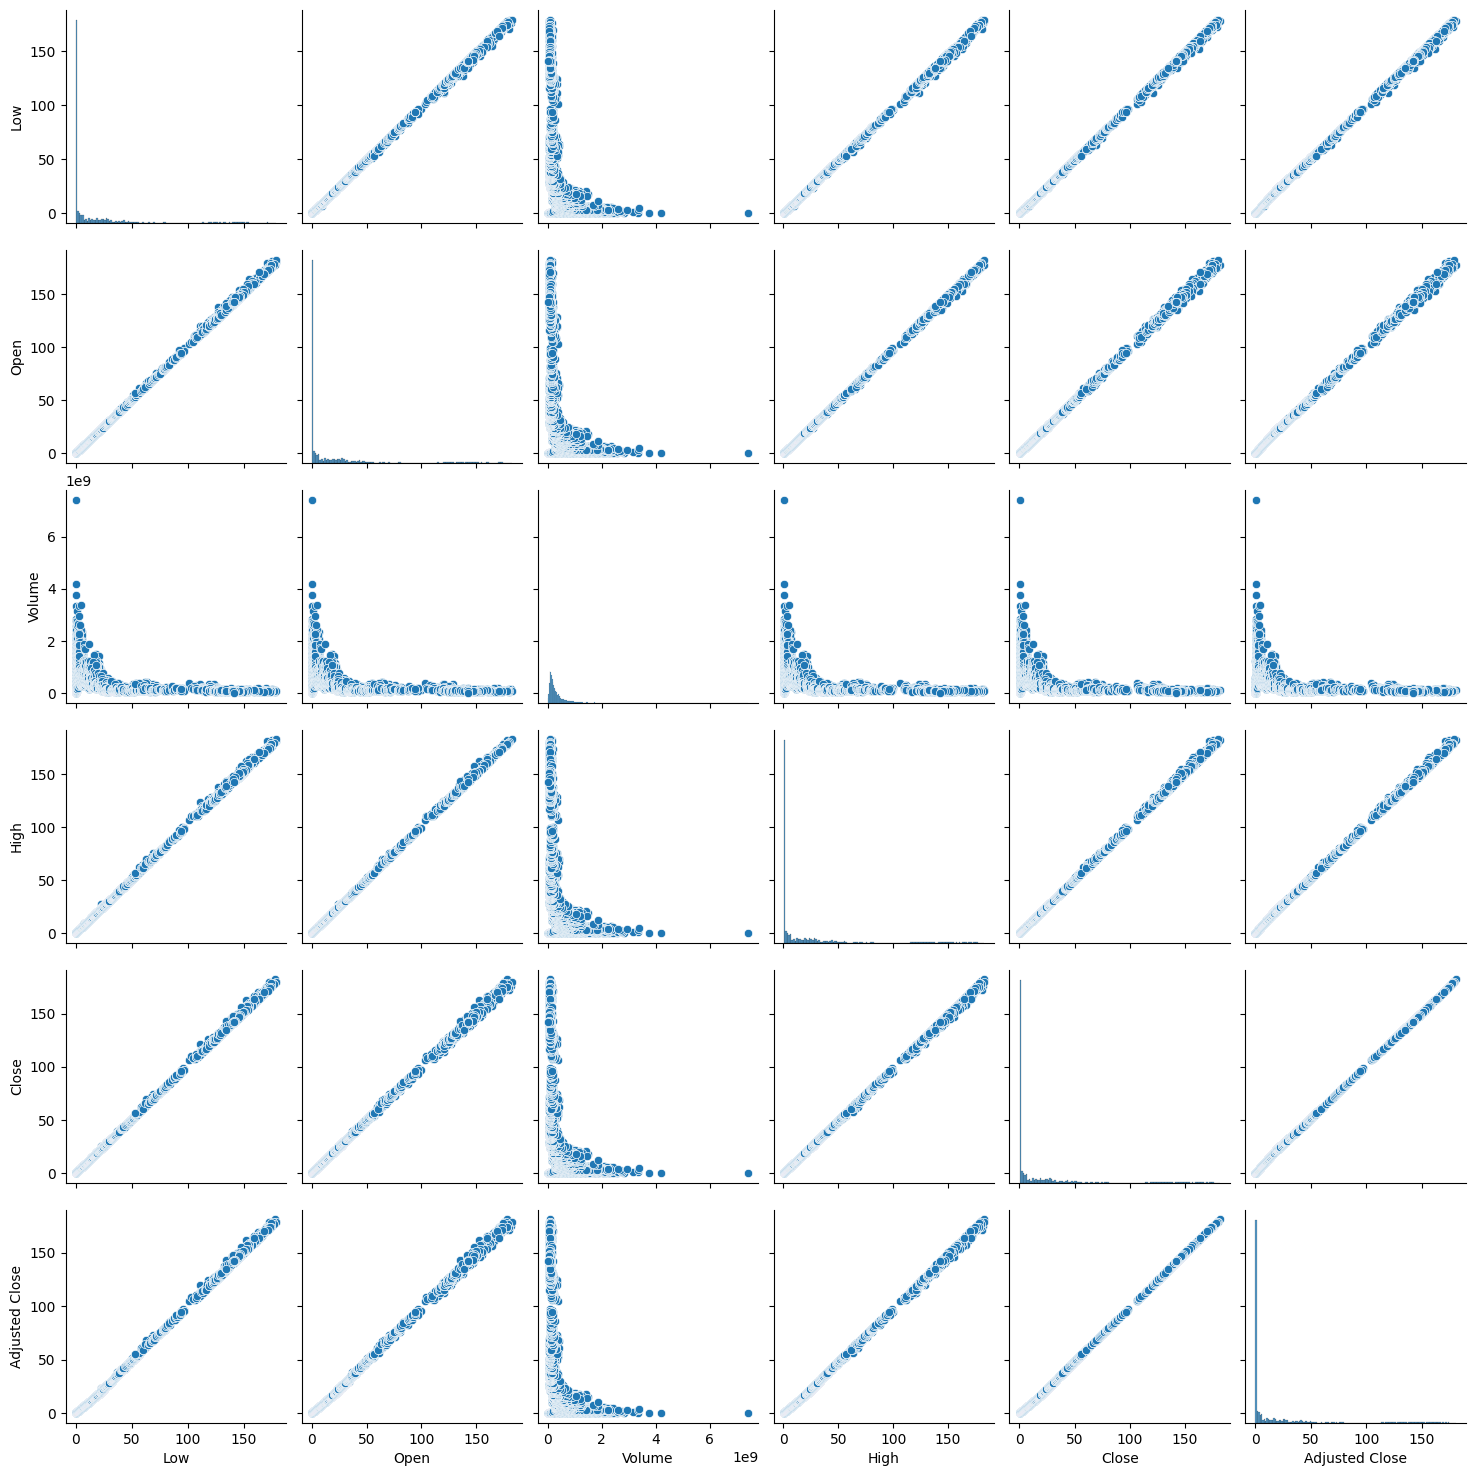

In [15]:
import seaborn as sns
sns.pairplot(df)
plt.show()

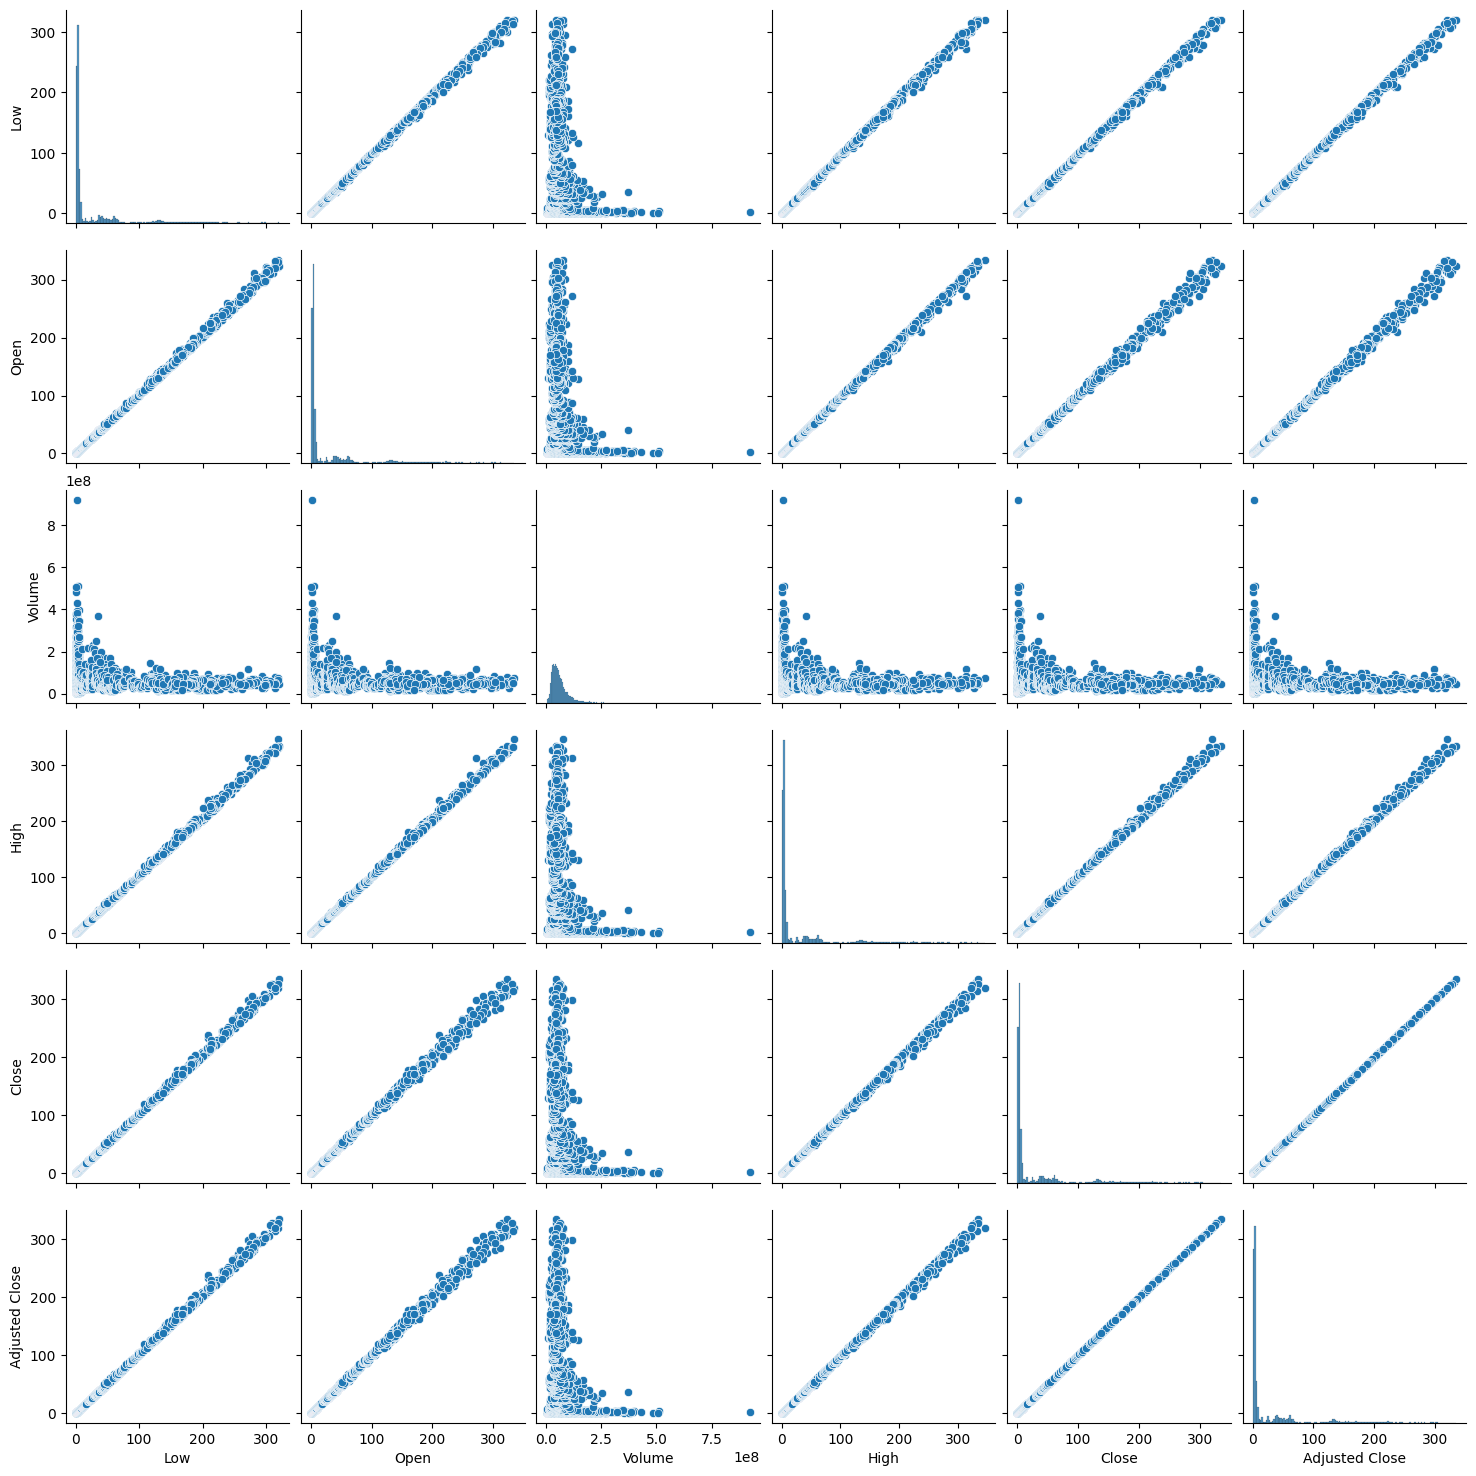

In [16]:
sns.pairplot(df2)
plt.show()

### 2. Compute Some Statistics from your Data

First, extract some characterisitics about the input (e.g., image size, means and standard deviation of values, sample frequency).

Describe statistics for numeric columns

In [17]:
numeric_stats = df.describe()
print("Descriptive Statistics:")
print(numeric_stats)

Descriptive Statistics:
                                Date           Low          Open  \
count                          10590  10590.000000  10590.000000   
mean   2001-12-04 16:56:17.677053824     16.141083     16.323966   
min              1980-12-12 00:00:00      0.049107      0.049665   
25%              1991-06-04 06:00:00      0.280134      0.286663   
50%              2001-11-29 12:00:00      0.477500      0.484375   
75%              2012-06-05 18:00:00     15.800536     16.009286   
max              2022-12-12 00:00:00    179.119995    182.630005   
std                              NaN     34.495971     34.904787   

             Volume          High         Close  Adjusted Close  
count  1.059000e+04  10590.000000  10590.000000    10590.000000  
mean   3.279583e+08     16.509548     16.332136       15.660944  
min    0.000000e+00      0.049665      0.049107        0.038213  
25%    1.215564e+08      0.293699      0.286830        0.237230  
50%    2.151240e+08      0.493304

Correlation matrix

In [18]:
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    Date       Low      Open    Volume      High     Close  \
Date            1.000000  0.653000  0.652610  0.148241  0.652179  0.652567   
Low             0.653000  1.000000  0.999924 -0.211636  0.999910  0.999926   
Open            0.652610  0.999924  1.000000 -0.210775  0.999939  0.999840   
Volume          0.148241 -0.211636 -0.210775  1.000000 -0.210241 -0.210949   
High            0.652179  0.999910  0.999939 -0.210241  1.000000  0.999925   
Close           0.652567  0.999926  0.999840 -0.210949  0.999925  1.000000   
Adjusted Close  0.639662  0.999613  0.999546 -0.213466  0.999657  0.999712   

                Adjusted Close  
Date                  0.639662  
Low                   0.999613  
Open                  0.999546  
Volume               -0.213466  
High                  0.999657  
Close                 0.999712  
Adjusted Close        1.000000  


Aggregate statistics for specific columns

In [19]:
agg_stats = df[['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']].agg(['mean', 'median', 'min', 'max'])
print("\nAggregate Statistics:")
print(agg_stats)


Aggregate Statistics:
               Low        Open        Volume        High       Close  \
mean     16.141083   16.323966  3.279583e+08   16.509548   16.332136   
median    0.477500    0.484375  2.151240e+08    0.493304    0.484375   
min       0.049107    0.049665  0.000000e+00    0.049665    0.049107   
max     179.119995  182.630005  7.421641e+09  182.940002  182.009995   

        Adjusted Close  
mean         15.660944  
median        0.401782  
min           0.038213  
max         180.959747  


Skewness and Kurtosis

In [20]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [21]:
from scipy.stats import skew, kurtosis
skewness = df[['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']].apply(skew)
kurt = df[['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']].apply(kurtosis)

print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurt)

Skewness:
Low               2.930211
Open              2.933177
Volume            3.549309
High              2.935913
Close             2.933107
Adjusted Close    3.001235
dtype: float64

Kurtosis:
Low                8.209771
Open               8.222479
Volume            30.117089
High               8.233873
Close              8.221783
Adjusted Close     8.575334
dtype: float64


Next, provide some characteristics about your output (e.g., histograms, spatial distribution of bounding boxes in the case of object detection, etc.). In the case of cases such as tasks such as reinforcement learning, you can provide details about the desired output and rewards used. You can show some correlations between inputs and outputs if possible.

#In these plots, you can visually inspect the shape of the distribution. If the distribution is symmetric, it indicates low skewness. If the distribution is more peaked or has heavier tails compared to a normal distribution, it indicates high kurtosis.

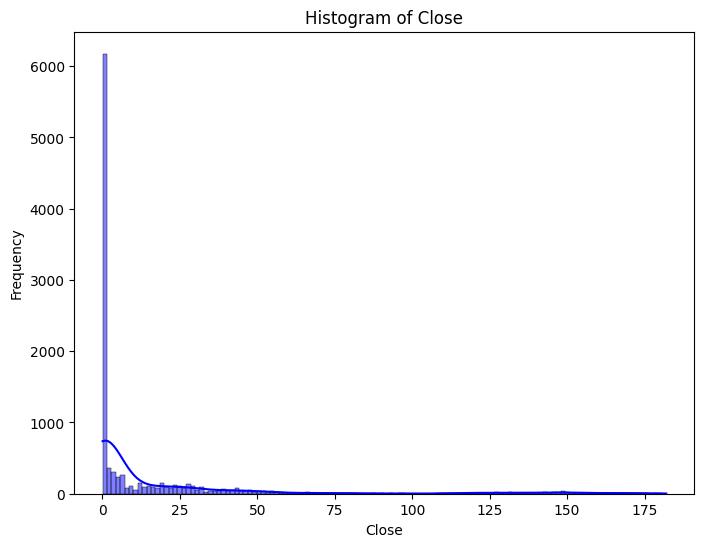

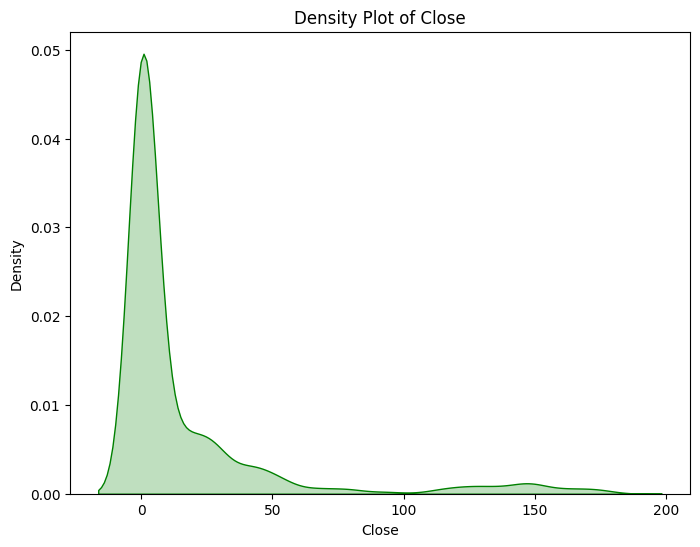

In [22]:
column_to_visualize = 'Close'

plt.figure(figsize=(8, 6))
sns.histplot(df[column_to_visualize], kde=True, color='blue')
plt.title(f'Histogram of {column_to_visualize}')
plt.xlabel(column_to_visualize)
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df[column_to_visualize], color='green', fill=True)
plt.title(f'Density Plot of {column_to_visualize}')
plt.xlabel(column_to_visualize)
plt.ylabel('Density')
plt.show()

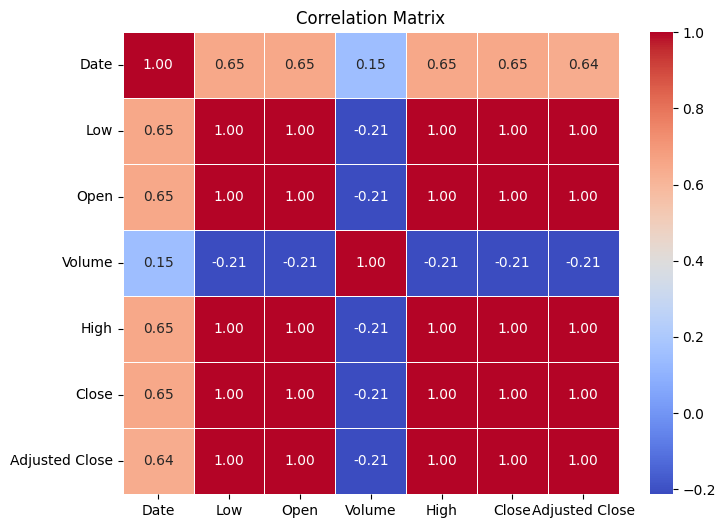

In [23]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

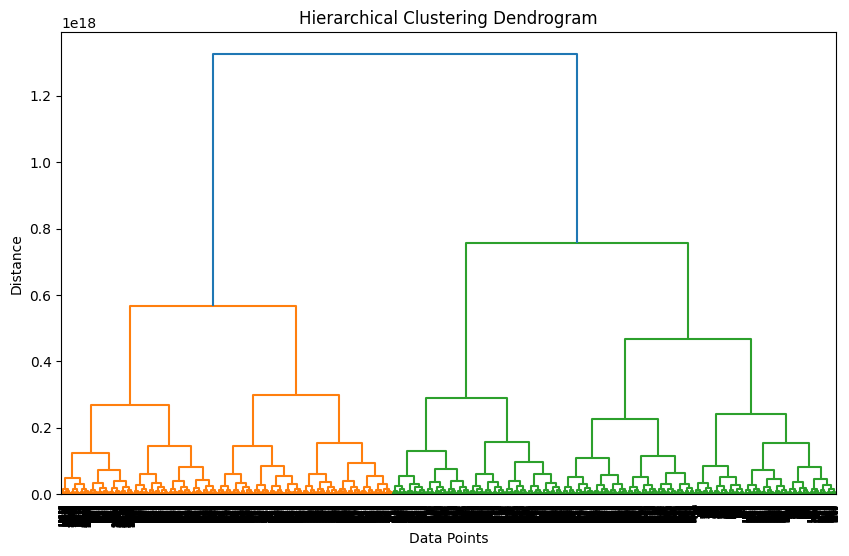

In [25]:
from scipy.cluster import hierarchy

numeric_df = df.apply(pd.to_numeric, errors='coerce')

numeric_df = numeric_df.dropna()

distance_matrix = hierarchy.distance.pdist(numeric_df)

clusters = hierarchy.linkage(distance_matrix, method='complete')

plt.figure(figsize=(10, 6))
hierarchy.dendrogram(clusters, labels=numeric_df.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


### 3. Comment on Your Data

Answer these questions as appropriate?
- Is your data balanced?
- Are there disparities in your input data? Does it show some specific patterns?

/var/folders/jk/wt3glx4s7vxblnk59wqsvwtr0000gn/T/ipykernel_25457/3917207331.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_distribution = class_distribution.groupby(pd.cut(np.arange(len(class_distribution)), bins)).sum()


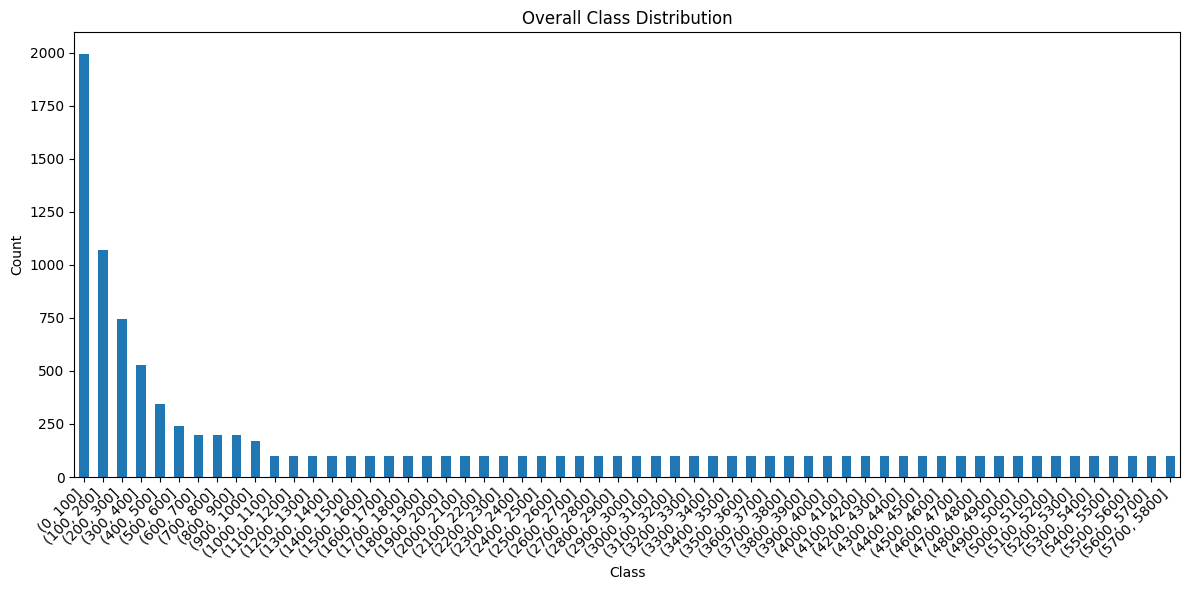

In [32]:
bins = np.arange(0, len(class_distribution), 100)  # Define bins with a width of 100
grouped_distribution = class_distribution.groupby(pd.cut(np.arange(len(class_distribution)), bins)).sum()

# Plot the grouped class distribution
plt.figure(figsize=(12, 6))
grouped_distribution.plot(kind='bar')
plt.title('Overall Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

1. As the data is pivoted upwards in the early class sizes, the Data is not balanced and could result in outliers, so may require techniques to work with imbalanced data.

In [ ]:

2. The correlation coefficients between the features ( Low, Open, Volume, High, Close) are quite high, indicating strong positive linear relationships between these variables. We cannot conclude any disparities between the features based on the correlation matrix.

`### Comment here`